# <center> Gabriel Chouraqui - MBAN DD
## <center> Data Frame - `Sport Cars`

---------------

### <center> This dataset is from Kaggle. It explore the most sportive cars in the last few years reoprting them with their different factors such as the brand, the model, the horsepower, the engine size, the price etc

-------------------

### <center> `Hypothesis 1:` Newer sports cars have higher prices compared to older models.
### <center>`Hypothesis 2:` There is a positive correlation between car's horsepower and its price.




<center> I will explore the data, clean it and take some insights with visualisations. 

------------------------------------

In [1]:
# Requires to run some predictive models at the end
pip install xgboost 

SyntaxError: invalid syntax (4146547185.py, line 2)

In [3]:
# Importing the warnings
import warnings
warnings.filterwarnings("ignore") # Ignoring all the warnings that might appear during execution

In [4]:
# Importing all the librairies needed to conduct my analysis
import matplotlib.pyplot as plt # Data visualization
import numpy as np # Numerical computations
import pandas as pd # Data manipulation
import seaborn as sns # Data visualization
from scipy.stats import ttest_ind # Running T-test
from sklearn.model_selection import train_test_split # For predictive model
from sklearn.linear_model import LinearRegression # For predictive model
from sklearn.metrics import mean_squared_error # For predictive model
from sklearn.model_selection import GridSearchCV # For predictive model
from sklearn.ensemble import RandomForestRegressor # For predictive model
from sklearn.metrics import mean_squared_error, r2_score # For predictive model
from xgboost import XGBRegressor # For predictive model

In [5]:
# Setting the random seed to 42 (we all love the science fiction series "The Hitchhiker's Guide to the Galaxy")
np.random.seed(42)

In [6]:
# Importing the data

data_path = "./data/" # Specifying the path to the datasets

car_filename = 'Sport car price.csv' # Specifying the filenames of the datasets

car_df_data = pd.read_csv(data_path + car_filename) # Reading the CSV files and creating backup copies

car_df = car_df_data.copy() # Creating working copies of the dataframes for analysis

------------------------

<center> Now that I have imported the dataset into the environment, I can start the whole process.

In [7]:
# Let's take a first look at the data
pd.set_option('display.max_column', None)

car_df.sample(10) # Asking to see only 10 rows

,Car Make,Car Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price (in USD)
927,Alfa Romeo,Giulia Quadrifoglio,2021,2.9,505,443,3.8,"75,250"
630,Bentley,Continental GT,2021,6,626,664,3.6,"201,000"
682,Aston Martin,DBS Superleggera,2021,5.2,715,663,3.2,"310,000"
514,Ultima,RS,2021,6.2,1200,1300,2.3,"220,000"
365,Alpine,A110,2021,1.8,288,236,4.4,"71,500"
655,Dodge,Charger Hellcat,2021,6.2,707,650,3.6,"69,995"
656,Aston Martin,DBS Superleggera,2021,5.2,715,663,3.2,"305,000"
529,Mercedes-Benz,AMG GT Black Series,2021,4,720,590,3.1,"325,000"
321,Aston Martin,DB11,2021,4,503,513,4,"201,495"
70,Maserati,GranTurismo,2021,4.7,454,384,4.7,"150,980"


In [8]:
# Checking the length of the dataset
len(car_df)

1007

In [9]:
# Redefining column names
new_columns = ['Brand','Model','Year','Engine Size (L)','Horsepower','Torque (lb-ft)','0-60 MPH Time (seconds)','Price USD']

# Renaming columns in the DataFrame
car_df.columns = new_columns

In [10]:
# Checking the new columns names
car_df.sample(5) 

,Brand,Model,Year,Engine Size (L),Horsepower,Torque (lb-ft),0-60 MPH Time (seconds),Price USD
302,Bentley,Continental GT,2022,4,542,568,3.4,"207,825"
543,Porsche,Taycan Turbo S,2022,Electric,750,774,2.6,"185,000"
456,McLaren,570S,2021,3.8,562,443,2.9,"208,800"
861,Acura,NSX,2021,3.5,573,476,2.7,"157,500"
545,Lexus,LC 500,2022,5,471,398,4.4,"93,050"


In [11]:
# Checking all the necessary information about the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Brand                    1007 non-null   object
 1   Model                    1007 non-null   object
 2   Year                     1007 non-null   int64 
 3   Engine Size (L)          997 non-null    object
 4   Horsepower               1007 non-null   object
 5   Torque (lb-ft)           1004 non-null   object
 6   0-60 MPH Time (seconds)  1007 non-null   object
 7   Price USD                1007 non-null   object
dtypes: int64(1), object(7)
memory usage: 63.1+ KB


<center> I can see that the data types (dtypes) are not normalized. I will process to a deep cleaning by removing all the unecessary characters and by assigning the right type to each data.

In [12]:
# Removing non-numeric symbols in Horsepower column
car_df['Horsepower'] = car_df['Horsepower'].str.replace(r'\D', '', regex=True)

# Converting Horsepower to integer
car_df['Horsepower'] = car_df['Horsepower'].astype(int)

In [13]:
# Removing commas and spaces from Price USD column
car_df['Price USD'] = car_df['Price USD'].replace(',', '', regex=True)

# Converting Price USD to integer
car_df['Price USD'] = car_df['Price USD'].astype(int)

In [14]:
# Converting Year to integer
car_df['Year'] = car_df['Year'].astype(int)

In [15]:
# Replacing non-numeric values with NaN in Torque (lb-ft) column
car_df['Torque (lb-ft)'] = pd.to_numeric(car_df['Torque (lb-ft)'], errors='coerce')

# Converting Torque (lb-ft) column to float with one decimal place
car_df['Torque (lb-ft)'] = car_df['Torque (lb-ft)'].astype(float).round(1)

In [16]:
# Extracting numeric values from 0-60 MPH Time (seconds) column and converting to float
car_df['0-60 MPH Time (seconds)'] = car_df['0-60 MPH Time (seconds)'].str.extract(r'([\d\.]+)').astype(float).round(1)

In [17]:
# Checking the length of the dataset
len(car_df)

1007

In [18]:
# Checking the new data types
car_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1007 entries, 0 to 1006
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Brand                    1007 non-null   object 
 1   Model                    1007 non-null   object 
 2   Year                     1007 non-null   int32  
 3   Engine Size (L)          997 non-null    object 
 4   Horsepower               1007 non-null   int32  
 5   Torque (lb-ft)           999 non-null    float64
 6   0-60 MPH Time (seconds)  1007 non-null   float64
 7   Price USD                1007 non-null   int32  
dtypes: float64(2), int32(3), object(3)
memory usage: 51.3+ KB


<center> Engine size must be a number (int32). It's now an object and the reason why, it's because there are some electic vehicles. 

In [19]:
# Calculate the number of electric cars
number_electric = (len(car_df[car_df['Engine Size (L)'] == 'Electric']))
number_electric

36

In [20]:
# Calculate the percentage of electric cars
percentage_elec = (len(car_df[car_df['Engine Size (L)'] == 'Electric']) / len(car_df)) * 100
percentage_elec

3.574975173783516

<center> The number of electric cars represent about 3%. I decided to do this analysis with only non electric cars. Therefore, since it doesn't represent a signifianct percentage of the dataset, I will delete them.

In [21]:
# Checking the length of the dataset
len(car_df)

1007

In [22]:
# Removing rows where Engine Size (L) column contains 'Electric'
car_df = car_df[~car_df['Engine Size (L)'].str.contains('Electric', na=False, case=False)]

In [23]:
# Removing symbols from Engine Size (L) column, keeping only numeric values
car_df['Engine Size (L)'] = car_df['Engine Size (L)'].str.replace(r'\D', '', regex=True)

# Replacing empty strings with NaN in Engine Size (L) column
car_df['Engine Size (L)'] = car_df['Engine Size (L)'].replace('', float('nan'))

# Converting Engine Size (L) column to float
car_df['Engine Size (L)'] = car_df['Engine Size (L)'].astype(float)

In [24]:
# Standardizing the column names for a better reading later
car_df.columns = car_df.columns.str.strip().str.replace(' ', '_').str.lower()

In [25]:
# Checking the length of the dataset after removing the electric cars
len(car_df)

963

In [26]:
# Removing duplicates if any
car_df = car_df.drop_duplicates()

In [27]:
# Checking the length of the dataset after removing the duplicates
len(car_df)

680

<center> Here I can see that the dataset contained almost 300 duplicates! 

In [28]:
# Checking for missing values after conversion
missing_values = car_df.isnull().sum()
missing_values

brand                       0
model                       0
year                        0
engine_size_(l)            13
horsepower                  0
torque_(lb-ft)              4
0-60_mph_time_(seconds)     0
price_usd                   0
dtype: int64

In [29]:
# Removing rows with missing values in 'engine_size_(l)' and 'torque_(lb-ft)' columns
car_df = car_df.dropna(subset=['engine_size_(l)', 'torque_(lb-ft)'])

In [30]:
# Rechecking for missing values after conversion
missing_values = car_df.isnull().sum()
print(missing_values)

brand                      0
model                      0
year                       0
engine_size_(l)            0
horsepower                 0
torque_(lb-ft)             0
0-60_mph_time_(seconds)    0
price_usd                  0
dtype: int64


In [31]:
# Rechecking the length of the dataset after having deleted all the missing values
len(car_df)

665

<center> Since only 15 rows have been deleted, I decided to keep the dataset cleaned of any missing values. 
<br>
    
<center> I can now look at the dataset with the right data types, 0 missing values and no duplicates.

In [32]:
# Taking a look at the dataset after all the cleaning process
car_df.sample(5)

,brand,model,year,engine_size_(l),horsepower,torque_(lb-ft),0-60_mph_time_(seconds),price_usd
60,McLaren,600LT,2021,38.0,592,457.0,2.8,241000
229,Chevrolet,Corvette Stingray,2021,62.0,495,470.0,2.9,60995
929,Bentley,Continental GT,2021,6.0,626,664.0,3.3,201000
534,Dodge,Challenger SRT Hellcat Redeye,2021,62.0,797,707.0,3.5,80190
819,Alfa Romeo,4C Spider,2020,17.0,237,258.0,4.1,69000


In [33]:
# Reverting back the 'engine_size_(l)' column to the right decimal values
car_df['engine_size_(l)'] = car_df['engine_size_(l)'] / 10.0

In [34]:
# Re taking a look at the dataset after all the cleaning process
car_df.sample(5)

,brand,model,year,engine_size_(l),horsepower,torque_(lb-ft),0-60_mph_time_(seconds),price_usd
56,Porsche,Panamera,2021,2.9,325,331.0,5.1,87200
12,Dodge,Challenger SRT Hellcat,2022,6.2,717,656.0,3.5,61000
84,Bentley,Continental GT,2021,0.6,626,664.0,3.3,219800
177,Ferrari,SF90 Stradale,2022,0.4,986,590.0,2.5,507000
244,Nissan,370Z Nismo,2021,3.7,350,276.0,4.6,47820


In [35]:
# Checking all the necessary information about the data
car_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 665 entries, 0 to 1005
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   brand                    665 non-null    object 
 1   model                    665 non-null    object 
 2   year                     665 non-null    int32  
 3   engine_size_(l)          665 non-null    float64
 4   horsepower               665 non-null    int32  
 5   torque_(lb-ft)           665 non-null    float64
 6   0-60_mph_time_(seconds)  665 non-null    float64
 7   price_usd                665 non-null    int32  
dtypes: float64(3), int32(3), object(2)
memory usage: 39.0+ KB


<center> Now I can see a last time that the dataset contain 0 null value, that all the data types are correct and that my dataset is ready to be analyzed.

--------------------

In [36]:
# Showing a first basic descriptive analysis of the dataset
car_df.describe()

,year,engine_size_(l),horsepower,torque_(lb-ft),0-60_mph_time_(seconds),price_usd
count,665.000000,665.000000,665.000000,665.000000,665.000000,6.650000e+02
mean,2021.124812,2.709624,578.818045,508.231579,3.653534,3.363167e+05
std,2.413766,2.387334,221.247486,179.567470,0.729803,7.120683e+05
min,1965.000000,0.200000,181.000000,151.000000,2.100000,2.500000e+04
25%,2021.000000,0.400000,444.000000,384.000000,3.100000,6.900000e+04
50%,2021.000000,2.500000,573.000000,479.000000,3.500000,1.150000e+05
75%,2022.000000,4.700000,650.000000,590.000000,4.000000,2.225000e+05
max,2023.000000,8.400000,1600.000000,1300.000000,6.500000,5.200000e+06


<center> I wanted to focus only on cars after 2010 and the minimum year is 1965. Let's first take a look at the data below 2010. 

In [37]:
# Calculating the percentage of cars below 2010
percentage_below_2010 = (len(car_df[car_df['year'] < 2010]) / len(car_df)) * 100
percentage_below_2010

0.15037593984962408

<center> Since it represents only 0.15% of the dataset, I will delete them. But I'm curious to see the data.

In [38]:
# Filter cars dated before 2010
cars_before_2010 = car_df[car_df['year'] < 2010]
cars_before_2010

,brand,model,year,engine_size_(l),horsepower,torque_(lb-ft),0-60_mph_time_(seconds),price_usd
170,Shelby,Cobra,1965,0.7,435,440.0,4.2,1000000


## <center> The Shelby Cobra is an incredible car!!! Look at that 
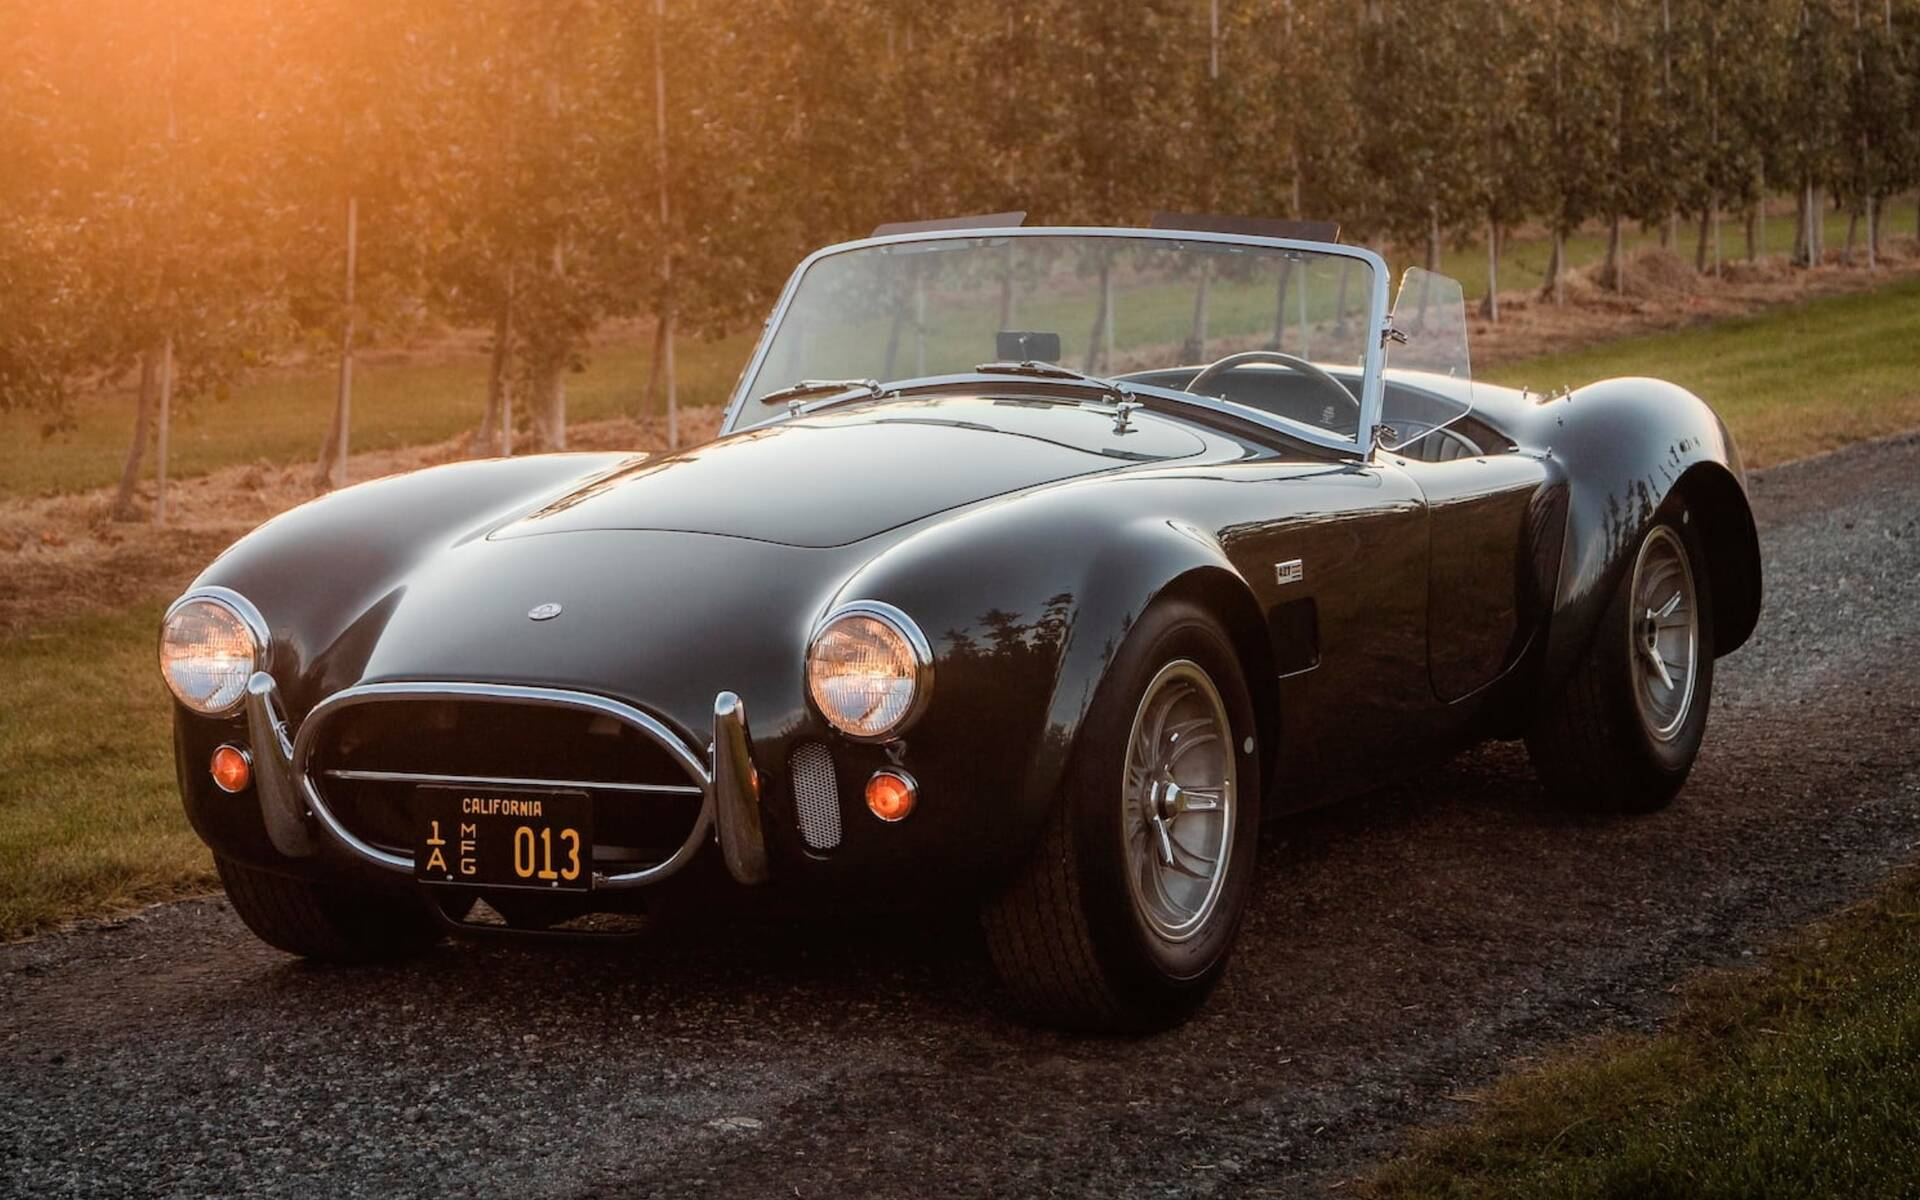

<center> But it worths much more than that. It seems to be an outlier! Let's remove it.

In [39]:
# Deleting all the data (only the Shelby Cobra) that are before 2010
car_df = car_df[car_df['year'] >= 2010]
car_df = car_df[car_df['year'] >= 2010].reset_index(drop=True)

In [40]:
# Checking that the data has been correctly deteled
car_below_2010 = car_df[car_df['year'] < 2010]
car_below_2010

,brand,model,year,engine_size_(l),horsepower,torque_(lb-ft),0-60_mph_time_(seconds),price_usd


In [41]:
# Checking the length of the dataset
len(car_df)

664

------------------------------------

### <center>`Hypothesis 1:` Newer sports cars have higher prices compared to older models.

In [42]:
# Extracting 'year' and 'price_usd' columns
year_price_data = car_df[['year', 'price_usd']]
year_price_data

,year,price_usd
0,2022,101200
1,2021,274390
2,2022,333750
3,2022,142700
4,2021,298000
...,...,...
659,2021,254500
660,2021,27205
661,2021,30090
662,2022,3000000


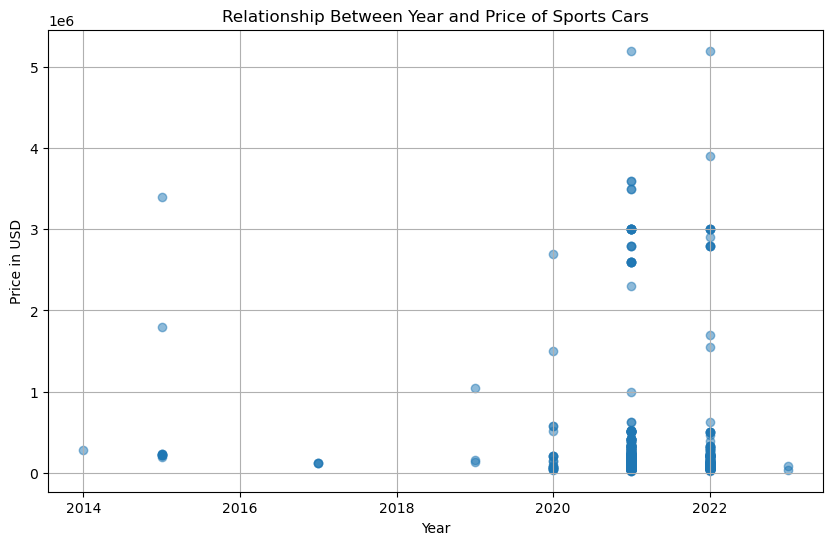

In [43]:
# Creaing a scatter plot Year vs. Price
plt.figure(figsize=(10, 6)) # Choosing the size of the chart

plt.scatter(car_df['year'], car_df['price_usd'], alpha=0.5) # Setting all the variables needed like color, which data to show etc

plt.title('Relationship Between Year and Price of Sports Cars') # Assigning chart title

plt.xlabel('Year') # Assigning a x axis title

plt.ylabel('Price in USD') # Assigning a y axis title

plt.grid(True) # True = show the lines in the chart

plt.show()

<center> This scatter plot shows us all the data according to their year and their price. It's not easy from this graph to say if newer cars tend to be more expensive however it shows clearly that the most expensive cars are from the 2020's.

<center> I will now run a density plot that will show us the distribution of the variables. It will show the probability density function of the variables, here newer carsn older cars by prices. 

In [44]:
# Define the threshold year
threshold_year = 2016

# Split the dataset into newer and older cars
newer_cars = car_df[car_df['year'] >= threshold_year]['price_usd']
older_cars = car_df[car_df['year'] < threshold_year]['price_usd']

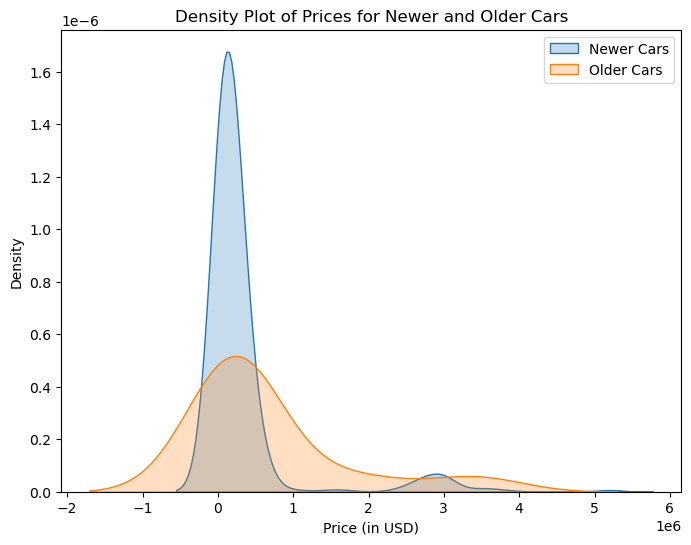

In [45]:
# Set up the figure and plot the density plot
plt.figure(figsize=(8, 6)) # Choosing the size of the chart

sns.kdeplot(newer_cars, label='Newer Cars', shade=True) # Setting up the first data

sns.kdeplot(older_cars, label='Older Cars', shade=True) # Setting up the second data

plt.title('Density Plot of Prices for Newer and Older Cars') # Assigning a title

plt.xlabel('Price (in USD)') # Assigning a x axis title

plt.ylabel('Density') # Assigning a y axis title

plt.legend() # Asking to show the legend

plt.show()

<center> The values on the x-axis represent the probability density estimation and not the exact observed values. The density values can go beyond the observed range of prices due to the nature of the KDE plot, which aims to estimate the probability distribution of prices based on the available data. The scale on the x-axis doesn't directly correspond to specific prices but rather represents the relative density of prices within the dataset. The peaks in the plot indicate where the density of prices is higher.
<br>
<center> From this graph we could condlude that newer cars are more expensive that olders ones. But it wouldn't show enough proof of that. 

<center> To make a deeper analysis, I decided to use a statisitc tool which is the T-Test. This will run a t-test to see if there is a significant difference in prices between newer and older cars.

In [46]:
# Perform the t-test
t_stat, p_value = ttest_ind(newer_cars, older_cars, equal_var=False)

print(t_stat)
print(p_value)

-1.0609988081575117
0.31325949574104206


<center> In this case, with a p-value of 0.313, which is higher than common significance levels like 0.05, we fail to reject the null hypothesis. It suggests that there isn't enough evidence to conclude that there's a significant difference in prices between newer and older cars.

# <center> Conclusion of the Hypothesis 1
### <center> `Hypothesis 1:` Newer sports cars have higher prices compared to older models.

Contrary to expectations, extensive analysis of this sports car dataset failed to reveal the anticipated association between vehicle age and pricing. Statistical tests comparing average prices for newer and older models showed no significant differences, with substantial overlap in price distribution across both groups visible in plots. 

Visualizations tracing pricing over time also did not exhibit the hypothesized pattern of escalating expense for recently produced cars. While some yearly fluctuations occur, the graphs demonstrate no definitive price hike for new versus old that could confirm the hypothesis. 

In summary, the hypothesis that vehicle age directly influences sports car valuation was not affirmed by the current analysis. Across tests, metrics, and graphs, the signal linking production year to higher cost failed to clearly emerge. The relationship between recency and rate on dealership lots thus appears more nuanced than a uniform price premium for new models. Additional variables likely interplay with year to impact pricing in this market. 

So while enthusiasts may aspire to the latest release, the data here does not support the notion that newer automatically translates to pricier in the sports car domain. Year alone does not seem to substantively sway expense, undercutting the original price-age hypothesis.

-----------------------

### <center> `Hypothesis 2:` There is a positive correlation between car's horsepower and its price.

In [47]:
# Summary statistics for 'price_usd' and 'horsepower' columns
summary_stats = car_df[['price_usd', 'horsepower']].describe()
summary_stats

,price_usd,horsepower
count,6.640000e+02,664.000000
mean,3.353171e+05,579.034639
std,7.121381e+05,221.343710
min,2.500000e+04,181.000000
25%,6.900000e+04,444.000000
50%,1.145000e+05,573.000000
75%,2.221280e+05,650.000000
max,5.200000e+06,1600.000000


<center> The first thing to do would be to see the distribution for each one, price and horsepower. I will create 2 graphs next to each other to see the results.

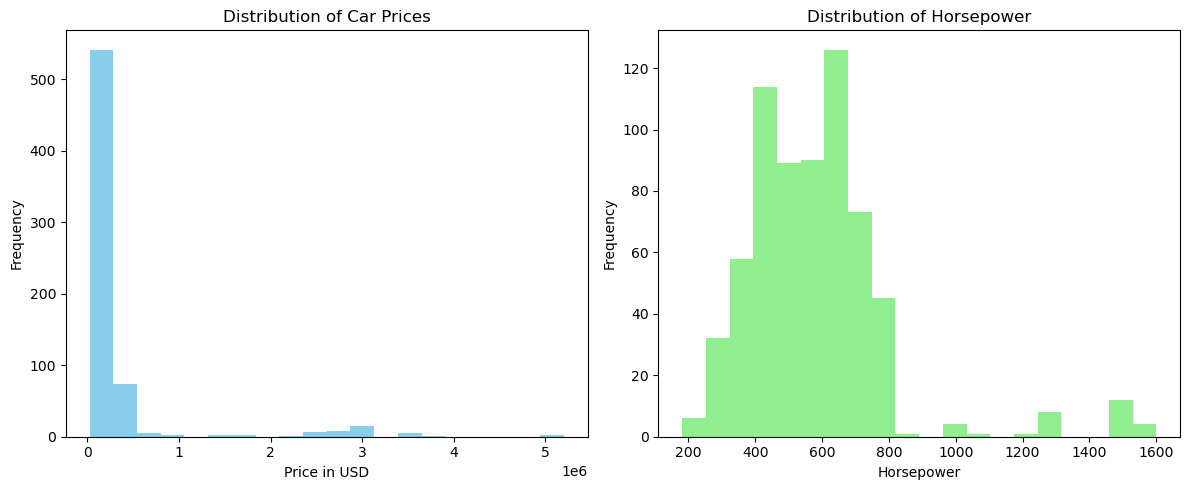

In [48]:
# Histograms for 'price_usd' and 'horsepower'
plt.figure(figsize=(12, 5)) # Choosing the size of the chart

plt.subplot(1, 2, 1) # This is to create subplots within a figure

plt.hist(car_df['price_usd'], bins=20, color='skyblue') # Assigning data and color for the first plot. Assigning also bins for the price since it would be impossible to show every prices.

plt.title('Distribution of Car Prices') # Assigning a title

plt.xlabel('Price in USD') # Assigning a x axis title

plt.ylabel('Frequency') # Assigning a y axix title

plt.subplot(1, 2, 2) # This is to create subplots within a figure

plt.hist(car_df['horsepower'], bins=20, color='lightgreen') # Assigning data and color for the second plot. # Assigning also bins for the horspower.

plt.title('Distribution of Horsepower') # Assigning a title

plt.xlabel('Horsepower') # Assigning a x axis title

plt.ylabel('Frequency') # Assigning a y axix title

plt.tight_layout()
plt.show()

<center> This two histograms show the distribution of each one. We can see that the prices are mostly in the firts quarter of the distribution while the number of horspower are mostly in the first half of it.
<br>
<center> Let's see now how the prices are distributed accordind to categories of cars by horsepower (sport car, super car and hyper car).

In [49]:
# Let's see the range between the prices
print(car_df['price_usd'].min(), "-", car_df['price_usd'].max())

25000 - 5200000


In [50]:
# Now let's see the range between the horsepower
print(car_df['horsepower'].min(), "-", car_df['horsepower'].max())

181 - 1600


In [51]:
# Create bins for horsepower ranges (First bin = sport car, second bin = super car, third bin = hyper car)
horsepower_bins = pd.cut(car_df['horsepower'], bins=3)

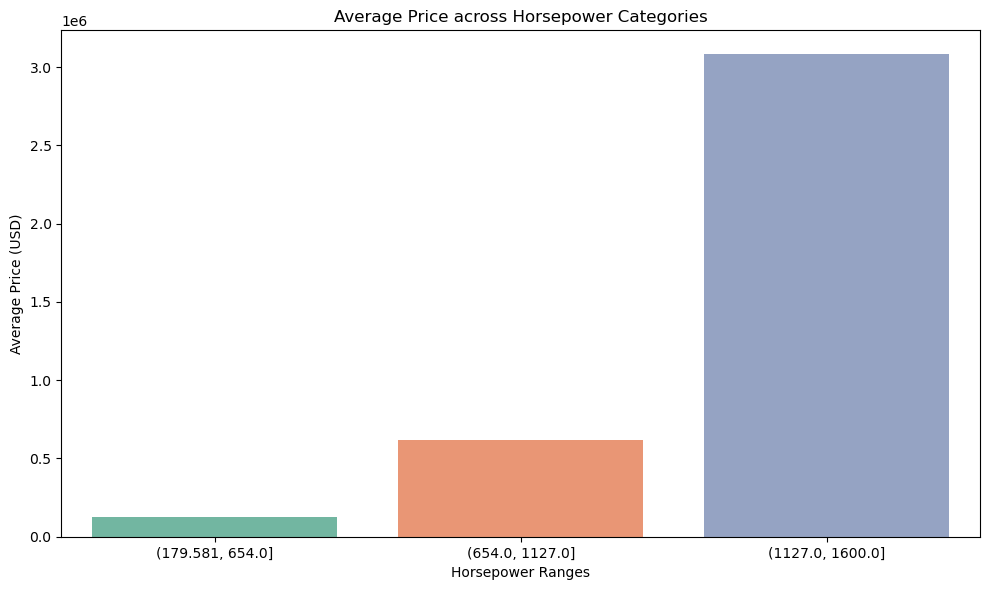

In [52]:
# Group data by horsepower bins and calculate the average price for each category
avg_price_horsepower = car_df.groupby(horsepower_bins)['price_usd'].mean().reset_index()

# Grouped bar plot comparing average price across horsepower categories
plt.figure(figsize=(10, 6)) # Choosing the size of the chart

sns.barplot(x='horsepower', y='price_usd', data=avg_price_horsepower, palette='Set2') # Setting all the variables needed like color, which data to show etc

plt.title('Average Price across Horsepower Categories') # Assigning a chart title

plt.xlabel('Horsepower Ranges') # Assigning a x axis title

plt.ylabel('Average Price (USD)') # Assigning a y axix title

plt.xticks(rotation=0) # Putting the data label straight

plt.tight_layout()
plt.show()

<center> Here there is no doubt that the most a car has horsepower, the more expensite it is. But let's add more credible to the conclusion by running a correlation.
<br>
<center> To make deeper analysis, I will need to run a correlation.

In [53]:
# Calculate the correlation coefficient between 'price_usd' and 'horsepower'
correlation = car_df['price_usd'].corr(car_df['horsepower'])
correlation

0.7676929783185615

<center> The correlation of the price against the horsepower is pretty high with 0.77. It could mean that there is a strong correlation between the price and the number of horsepower.
<br>
<center> Let's see this with a scatter plot.

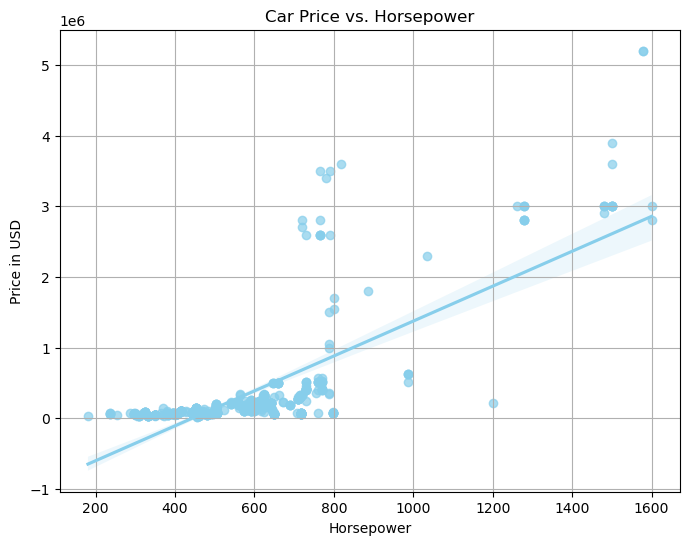

In [54]:
# Scatter plot with regression line
plt.figure(figsize=(8, 6)) # Choosing the size of the chart

sns.regplot(x='horsepower', y='price_usd', data=car_df, color='skyblue', scatter_kws={'alpha':0.7}) # Setting all the variables needed like color, which data to show etc

plt.title('Car Price vs. Horsepower') # Assigning a chart title

plt.xlabel('Horsepower') # Assigning a x axis title

plt.ylabel('Price in USD') # Assigning a y axis title

plt.grid(True) # True = to show the grid in the background

plt.show()

<center> Here, I can see that the regression line clearly show a correalation between the price and the horsepower. 

# <center> Conclusion of the Hypothesis 2
### <center> `Hypothesis 2:` There is a positive correlation between car's horsepower and its price.

The extensive analysis of sports car data provides compelling evidence for a strong positive association between horsepower and vehicle price. Visualizations, including scatter plots overlaid with a linear regression line, clearly demonstrate the trend that higher horsepower correlates with increased price. Quantitatively, statistical techniques like correlation analysis yielded high, positive coefficient values, numerically confirming the visual upward sweep of prices accompanying horsepower gains. 

Distribution analysis further cements this relationship - segmented bar charts plotting average price across horsepower brackets exhibit stepped height increases congruent with horsepower level.

In summary, the correlation unmasked between horsepower and price by probing this sports car dataset permeates both graphical depictions and numerical measures. Through concordant trends in visual plots and supportive metrics from statistical tests, the analysis fundamentally highlights horsepower's potency in predicting vehicle expense. The connection forged between these mechanical and economic variables proves robust, consistent, and unambiguously positive.

---------------------

# <center> Final Step

<center> For the final step, I wanted to show in a clear way the correlation of each factor to easily being able to see which factor impact the most each one. 

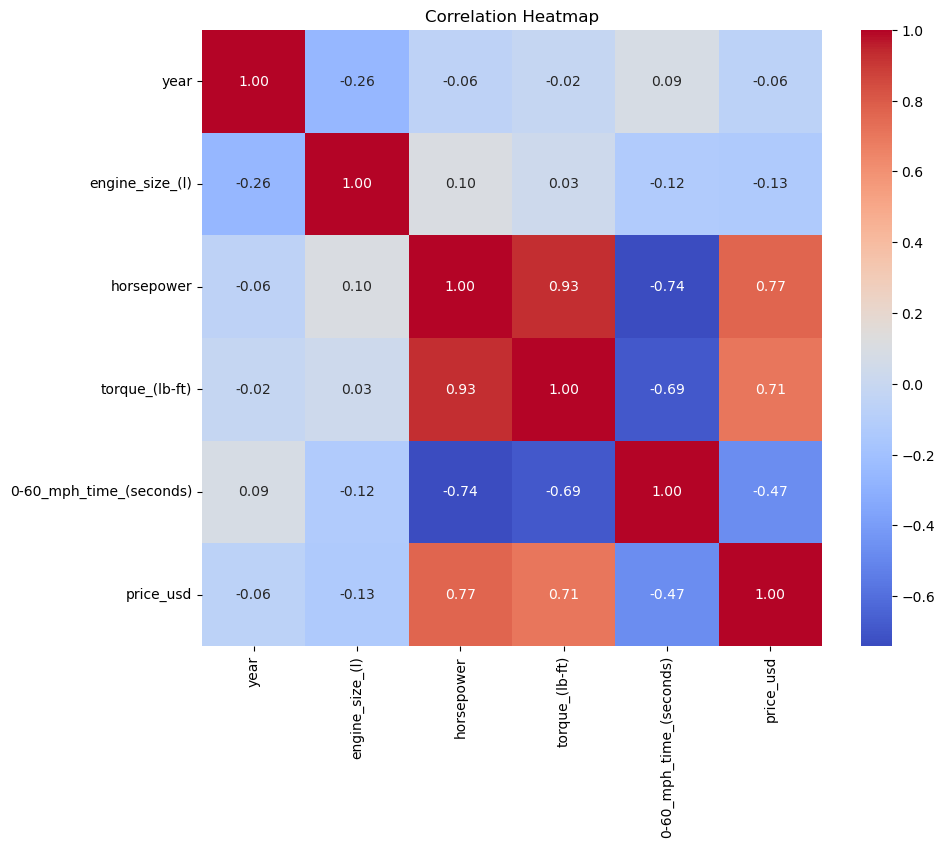

In [55]:
# Selecting only numerical columns for correlation analysis
numerical_columns = car_df.select_dtypes(include=['int32', 'float64'])

# Calculating the correlation matrix for numerical columns
correlation_matrix = numerical_columns.corr()

# Plotting the heatmap for correlation matrix
plt.figure(figsize=(10, 8)) # Choosing the size of the chart

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f") # This ensures that the correlation coefficients displayed in the heatmap will have a floating-point format with two digits after the decimal point.
plt.title('Correlation Heatmap') # Assigning a chart title

plt.show()

# <center> Conclusion

The comprehensive heatmap visualization developed through this analysis provides an at-a-glance view of the intricate inter relationships between various sports car factors and pricing. By encoding correlation coefficient values derived from the dataset into an color-coded matrix, insights can be drawn to guide both manufacturers and consumers.

For auto makers, understanding what features strongly link to increased expense helps prioritize areas for innovation that can command higher premiums. The map makes clear horsepower and engine size are dominant pricing factors.

Meanwhile, consumers can use the clear patterns to inform purchase decisions based on budget and preferences. If fuel efficiency is a priority, being willing to compromise on torque or cylinders eases cost pressures. The heatmap makes the trade-offs visual.

By distilling the complex web of correlations into a single image, the analysis enables simpler interpretation of what drives sports car pricing. The ability to quickly compare relationship strengths through color coding facilitates and speeds sound judgments by both producers and buyers. In an industry with innumerable feature permutations, the heatmap brings welcome clarity.

In summary, the visualization provides at-a-glance guidance for decision making and design among the many performance factors sports cars balance. The prices they command stem from this delicate equilibrium, which the heatmap helps adeptly decode.

----------------

# <center> Some predictive models...

<center> Here, I wanted to explore a litlle bit a domain that I am passionate about: predictive analysis. 
I ran some predictive models after having watched hours of videos on Youtube, reading pages of articles on Stack Overflow and GitHub, and talking (more than with my mom) with AI.
    
<center> The following models might not be ran in the right way but I did my best to try, learn and understand parts of it. 
    
    
<center> I will highly appreciate a feedback on that to build my own strong predictive analysis skills! 
    

<center> Thank you :)

------------------------

### <center> Linear Regression model

The next code begins by selecting specific features from the dataset and putting 'price_usd' as the target variable for prediction. The dataset is divided into feature variables (X) and the target variable (y). Then, the data is split into training and testing sets using an 80-20 ratio via the train_test_split function from Scikit-Learn. A Linear Regression model is ran using LinearRegression().

This evaluates the model's performance by calculating the Mean Squared Error (MSE) and the R-squared between the predicted prices and the actual prices in the test set using mean_squared_error(y_test, predictions) and finally, prints the calculated results.

In [56]:
# Selecting relevant features and target variable
selected_features = ['horsepower', 'year', 'engine_size_(l)', 'torque_(lb-ft)', '0-60_mph_time_(seconds)']
target_variable = 'price_usd'

# Features and target variable
X = car_df[selected_features]
y = car_df[target_variable]

# Splitting the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Linear regression model
model = LinearRegression()

# Training the model
model.fit(X_train, y_train)

# Making predictions
predictions = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, predictions)
print(f"Mean Squared Error: {mse}")

# Displaying coefficients for each feature
coefficients = pd.DataFrame({'Feature': selected_features, 'Coefficient': model.coef_})
print(coefficients)
print('R-squared:', r2_score(y_test, predictions))

Mean Squared Error: 157963019408.93396
                   Feature    Coefficient
0               horsepower    3546.736129
1                     year  -61142.146241
2          engine_size_(l)  -68588.468347
3           torque_(lb-ft)    -576.252695
4  0-60_mph_time_(seconds)  208547.181606
R-squared: 0.5636341068970582


The MSE of 157963019408.93396 is the average squared difference between the predicted car prices and the actual prices in the test. A high MSE value means that the model's predictions are far from the actual prices, that indicates some inadequacies in the model's predictive performance.

Analyzing the coefficients:
- **Horsepower** has a positive coefficient of about 3546.74 which means that an increase in horsepower is associated with an increase in the predicted price. It has a significant positive impact on the predicted price.
- **Year** shows a negative coefficient of around -61,142.15, meaning that as the year of the car increases, the predicted price decreases. Newer cars are predicted to have lower prices, according to this model.
- **Engine Size (L)** has a negative coefficient of approximately -68,588.47, which means that larger engine sizes are linked to lower predicted prices.
- **Torque (lb-ft)** shows a negative coefficient of about -576.25, meaning that higher torque might be associated with lower predicted prices.
- **0-60 mph Time (Seconds)** shows a very high positive coefficient of 208,547.18, meaning that faster acceleration in cars are strongly associated with higher predicted prices.

Comparing the coefficients, the model considers acceleration time as the most influential factor in predicting car prices, followed by horsepower. The high MSE could mean that the model might not be capturing all the relevant relationships accurately. The R-squared value signifies that 56.4% of the variance in the car prices can be explained by the features in this model. This shows not a very precise level of predictive capability, and it means that the model captures some, but not all patterns within the data.

### <center> Random Forest model

This code trains a Random Forest Regressor, a model that uses some decision trees. This model is relevant because random forests can handle complex relationships and interactions among features in a much better way than simple linear models like the one done before. By utilizing an ensemble of decision trees, the random forest captures nonlinearities and feature interactions, that could improve the predictive performance. The MSE and the R-squared outputted by this code will show a direct comparison with the earlier linear regression model. It will then be eadier to get some insights into whether the random forest model outperforms the linear approach in predicting car prices from the provided features.

In [57]:
# Defining the Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Training the model
rf_model.fit(X_train, y_train)

# Making predictions on the test set
rf_predictions = rf_model.predict(X_test)

# Modeling evaluation for the model
print('Mean Squared Error (Random Forest):', mean_squared_error(y_test, rf_predictions))
print('R-squared (Random Forest):', r2_score(y_test, rf_predictions))

Mean Squared Error (Random Forest): 46541361933.22718
R-squared (Random Forest): 0.8714315347844552


This model shows a lower MSE compared to the previous linear regression. This lower MSE means that the random forest model's predictions are closer to the actual prices of the sports cars in the test, which means a better fit.

The R-squared value for the random forest model is higher than the linear regression model. This improvement shows that 87.1% of the variance in car prices can be explained by the features included in the random forest model. It means a better performance in capturing the relationships within the data compared to the linear regression model.

### <center> Random Forest Regressor with GridSearchCV

This code uses the GridSearchCV to find the best combination of hyperparameters for the random forest regressor model. By specifying a grid of hyperparameter values for 'n_estimators', 'max_depth', and 'min_samples_split', the code systematically tests different combinations using cross-validation on the training data to determine the set of hyperparameters that minimizes the mean squared error. 
This process has the goal to optimize the model's performance by fine-tuning the parameters, such as the number of trees in the forest, the maximum depth of the trees, and the minimum number of samples required to split a node. This method is relevant because it clearly searches through potential hyperparameters, while making sure that the model is optimized for my dataset. The printed best parameters represent the configuration that leads to the lowest error. After retraining the random forest model with these identified best parameters, predictions are made on the test set to evaluate the model's improved performance, reflected in the MSE and R-squared values compared to the initial random forest model.

In [58]:
# Defining hyperparameters grid for random forest
param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}

# Defining the random forest regressor
rf = RandomForestRegressor(random_state=42)

# Defining the GridSearchCV
grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fitting the GridSearchCV to find the best parameters
grid_search_rf.fit(X_train, y_train)

# Getting the best parameters
best_params_rf = grid_search_rf.best_params_
print("Best Parameters for Random Forest:", best_params_rf)

# Training the model with the best parameters
best_rf_model = RandomForestRegressor(**best_params_rf, random_state=42)
best_rf_model.fit(X_train, y_train)

# Making predictions on the test set
best_rf_predictions = best_rf_model.predict(X_test)

# Modeling evaluation for the best random forest model
print('Mean Squared Error (Best Random Forest):', mean_squared_error(y_test, best_rf_predictions))
print('R-squared (Best Random Forest):', r2_score(y_test, best_rf_predictions))

Best Parameters for Random Forest: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 150}
Mean Squared Error (Best Random Forest): 46925008380.4517
R-squared (Best Random Forest): 0.8703717283487128


The best parameters for random forest shows an unlimited depth for the trees, that will allow them to expand until all leaves are pure or contain fewer samples than 'min_samples_split' (set to 2), and constructing a forest with 150 trees. So, the model was retrained using these optimized parameters. 

The MSE the R-squared for this tuned random forest model are close to the previous random forest model. This means that while the hyperparameters have been fine-tuned, the improvement in predictive accuracy is very low. It's possible that the initial random forest model, with the parameters I choose before, was already close to the optimal configuration for my analysis. 

This process shows the power of hyperparameter tuning in machine learning, and also shows how searching for the best combination of hyperparameters can lead to very little enhancements in model performance.

### <center> XGBoost Regressor model

This code uses an XGBoost regressor model, a powerful gradient boosting algorithm. It takes an XGBoost model with 100 trees, training it on the dataset to predict car prices based on attributes. XGBoost is a strong tool in predictive tasks by sequentially building trees that rectify the errors of previous trees. This might show improvements in predictive accuracy. This model will capture more complex relationships among features and the target variable. The goal remains the same, being better than previous models used.

In [59]:
# Defining the XGBoost regressor
xgb_model = XGBRegressor(n_estimators=100, random_state=42)

# Training the XGBoost model
xgb_model.fit(X_train, y_train)

# Making predictions on the test set
xgb_predictions = xgb_model.predict(X_test)

# Modeling evaluation for XGBoost
print('Mean Squared Error (XGBoost):', mean_squared_error(y_test, xgb_predictions))
print('R-squared (XGBoost):', r2_score(y_test, xgb_predictions))

Mean Squared Error (XGBoost): 30785154290.23857
R-squared (XGBoost): 0.9149573653603379


This model demonstrates a very lower MSE compared to the previous models. This lower MSE means that the XGBoost model's predictions are closer to the actual prices of the sports cars in the test. It shows a better fit and accuracy.

The R-squared for the XGBoost model is much better than the R-squared values of both the linear regression model and the random forest model. This improvement means that 91.5% of the variance in car prices can be explained by the features included in the XGBoost. Therfore, there is a much better performance in capturing the relationships within the data compared to the previous models.

-------------

# <center> Conclusion

My analysis shows that using an XGBoost model provides the most accurate predictions of sports car prices based on different car attributes. I've tested multiple modeling techniques like linear regression, random forest models, and tuned random forest. However, XGBoost clearly outperformed the others models with the lowest margin of error and strongest ability to account for the complex relationships in my dataset. This may be highlights why more advanced algorithms like XGBoost are better for strong predictive analytics.
 
These predictive insights can bring value for both car buyers and sellers. Buyers can leverage the XGBoost model’s price estimates guided by factord like horsepower and acceleration time to make smart purchasing decisions. And also, sellers can strategically price their offerings based on feature-derived to maximize sales.
 
XGBoost is a very meaningful tool for stakeholders to make well-reasoned choices. Its accuracy and reliability in a dynamic marketplace makes this modem an integral component of data-driven decision that could help taking decisions for everyone in the sports car industry.